## 2D Beamforming
- Note that the calibration process is only suitable for IPLab data. If you want to use original TI calibration result, you need to calculate the calibration matrix manually from range FFT and peak search results generated by TI codes.

### 1. Load configuration file

In [4]:
import os
import sys

os.chdir('..')
sys.path.append(os.getcwd())

In [5]:
from config import JSONConfig

# load config
cfg = JSONConfig('/mnt/c/ti/mmwave_studio_03_00_00_07/mmWaveStudio/PostProc/hiber2_408/hiber2_408.mmwave.json')

### 2. Load data

In [3]:
from datareader import AWR2243Reader
from radardsp.utils.preprocess.calibration import apply2243_calib_vector_iplab

reader = AWR2243Reader.from_config(cfg, '/mnt/c/ti/mmwave_studio_03_00_00_07/mmWaveStudio/PostProc/hiber2_408')

## read all captures and frames inside reader directory
# capturenum, _ = reader.count_captures()
# for c in range(capturenum):
#     framenum, _, _ = reader.get_capture_info(c)
#     for f in range(framenum):
#         frame = reader.readframe(c, f)

calibfile = 'resources/id253-hor-cali.mat'

# calibrate frame
frame = reader.readframe(capture_idx=0, frame_idx=0)
calibratated_frame = apply2243_calib_vector_iplab(frame, calibfile)

### 3. Generate AoA-ToF by 2D Beamforming

In [4]:
from radardsp.processor import BeamformingProcessor
from radardsp.utils.preprocess.antennas import adc2virtual_array

process_setting = 'settings/processing.py'
processor = BeamformingProcessor(process_setting)
# import cProfile

# cProfile.run('processor = BeamformingProcessor(process_setting)')

In [5]:
rxl, txl = processor.cfg.layout['rxl'], processor.cfg.layout['txl']
va_adc = adc2virtual_array(calibratated_frame, rxl, txl)
aoatof = processor.process(va_adc)

### 4. Plotting

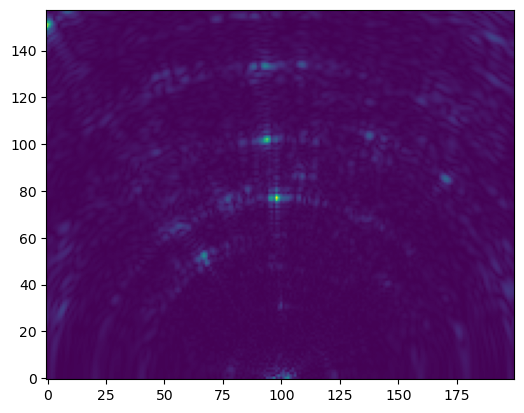

In [6]:
import matplotlib.pyplot as plt

plt.imshow(abs(aoatof))
plt.gca().invert_yaxis()